## Bacterial rates stat-analyses

In [2]:
library(gdata)
library(RColorBrewer)

In [6]:
meta_data <- read.xls('metadata_updated_rates.xlsx', stringsAsFactors = F)
meta_data <- meta_data[, -ncol(meta_data)]
meta_data$short_name <- gsub('_+$', '', gsub('ucld|_rc|_rs|_sc|_ss|_bs|constant|strict', '', meta_data$file_name))
head(meta_data[, c('beast_genomic_rate', 'Name')])
head(meta_data)

,beast_genomic_rate,Name
1,1.562162e-08,M. leprae
2,1.572643e-08,Y. pestis
3,2.260972e-08,Y. pestis (second pandemic)
4,5.675213e-08,M. tuberculosis Lineage 4
5,6.049665e-08,N. meningitis
6,7.604037e-08,S. Paratyphi A (two clades)


In [7]:
lm_randomisation <- function(rate, denominator, nreps = 1000, log_log = T){
    # Spurious correlations arise when y/x ~ x. 
        # To solve do
        # y/x * x = y
        # randomise y -> yr 1000 times
        # run regression using yr/x ~x: this is the null distribution
        true_lm <- lm(rate ~ denominator)
        if(log_log){
            get_rate <- function(a, b) return(a+b)
        }else{
            get_rate <- function(a, b) return(a*b)
        }
        y <- get_rate(rate, denominator)
        x <- denominator
        null_dist <- vector()
        for(i in 1:nreps){
            yr <- sample(x = y, size = length(y))
            yr.x <- get_rate(yr, x)
            null_dist[i] <- lm(yr.x ~ x)$coefficients[2]
        }
                
        return(list(0.5 - abs(sum(true_lm$coefficients[2] > null_dist)/nreps - 0.5), null_dist, true_lm$coefficients))
    }


In [9]:
pdf('fig1.pdf', useDingbats = F, width = 22.5, height = 7)
par(mfrow = c(1, 2))
par(mar = c(4, 4, 2, 2))

pass_cr1 <- (meta_data$temp_stucture_degree > 0.5)
drt <- c(21, 20)[pass_cr1 + 1]
#gram_code <- c(rgb(1,0,0.7, 1), rgb(0, 0, 1, 0.7))[meta_data$gram_coded]
#cols <- meta_data$species
plot(log10(meta_data$gsize_check), log10(meta_data$beast_genomic_rate), pch = drt, xlim = c(6.15, 6.8),
     ylab = 'Genomic rate (subs/site/year)', xlab = 'Genome size (sites)', cex = 2.5) #col = gram_code, 
genome_size_reg <- lm(log10(meta_data$beast_genomic_rate)[pass_cr1] ~  log10(meta_data$gsize_check)[pass_cr1])
abline(genome_size_reg)
text(log10(meta_data$gsize_check), log10(meta_data$beast_genomic_rate), 
     labels = meta_data$code, cex = 0.9, pos = 2)#, vfont = c('sans serif', 'italic'))
print(summary(genome_size_reg))

plot(meta_data$CG., log10(meta_data$beast_genomic_rate), pch = drt, 
      xlab = 'GC content (%)', ylab = '', cex = 2.5) 
cg_reg <- lm(log10(meta_data$beast_genomic_rate)[pass_cr1] ~ meta_data$CG.[pass_cr1])
abline(cg_reg)
text(meta_data$CG., log10(meta_data$beast_genomic_rate),
     labels = meta_data$code, cex = 0.9, pos = 2)#, vfont = c('sans serif', 'italic'))
print(summary(cg_reg))


#plot(log10(meta_data$sampling_time), log10(meta_data$beast_genomic_rate), pch = drt, 
#      xlab = 'Sampling time (years)', ylab = '', cex = 1.5, xlim = c(0, 3.3)) #col = gram_code,
#text(log10(meta_data$sampling_time), log10(meta_data$beast_genomic_rate), 
#     labels = meta_data$species, cex = 0.5, pos = 2, vfont = c('sans serif', 'italic'))


#sampling_time_reg <- lm(log10(meta_data$beast_genomic_rate)[pass_cr1] ~ log10(meta_data$sampling_time)[pass_cr1]) 
#abline(sampling_time_reg)
#print(summary(sampling_time_reg))
#random_time_reg <- lm_randomisation(rate = log10(meta_data$beast_genomic_rate)[pass_cr1], denominator = log10(meta_data$sampling_time)[pass_cr1])

dev.off()


Call:
lm(formula = log10(meta_data$beast_genomic_rate)[pass_cr1] ~ 
    log10(meta_data$gsize_check)[pass_cr1])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25418 -0.56926  0.03035  0.47699  0.94576 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)                              3.5333     4.2815   0.825   0.4167  
log10(meta_data$gsize_check)[pass_cr1]  -1.5122     0.6568  -2.302   0.0296 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5837 on 26 degrees of freedom
Multiple R-squared:  0.1694,	Adjusted R-squared:  0.1374 
F-statistic: 5.301 on 1 and 26 DF,  p-value: 0.02957


Call:
lm(formula = log10(meta_data$beast_genomic_rate)[pass_cr1] ~ 
    meta_data$CG.[pass_cr1])

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4404 -0.2188  0.1296  0.3513  0.5916 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             

pdf 
  2

In [44]:
pdf('Fig2.pdf', useDingbats = F , width = 22.5, height = 7)
par(mfrow = c(1, 2))
plot(log10(meta_data$sampling_time), log10(meta_data$beast_genomic_rate), pch = drt, 
      xlab = 'Sampling time (years)', ylab = 'Genomic rate using (subs/site/year)', cex = 2.5, xlim = c(0, 3.3)) #col = gram_code,
text(log10(meta_data$sampling_time), log10(meta_data$beast_genomic_rate), 
     labels = meta_data$code, cex = 0.9, pos = 2)#, vfont = c('sans serif', 'italic'))

sampling_time_reg <- lm(log10(meta_data$beast_genomic_rate)[pass_cr1] ~ log10(meta_data$sampling_time)[pass_cr1]) 
abline(sampling_time_reg)
print(summary(sampling_time_reg))
random_time_reg <- lm_randomisation(rate = log10(meta_data$beast_genomic_rate)[pass_cr1], denominator = log10(meta_data$sampling_time)[pass_cr1])
print(random_time_reg)

plot(log10(meta_data$pop_size), log10(meta_data$beast_genomic_rate), pch = drt, 
    xlab = 'Effective population size Ne(t)', ylab = 'Genomic rate using (subs/site/year)', cex = 2.5)
text(log10(meta_data$pop_size), log10(meta_data$beast_genomic_rate), 
    labels = meta_data$code, cex = 0.9, pos = 2)#, vfont = c('sans serif', 'italic'))
pop_size_reg <- lm(log10(meta_data$beast_genomic_rate) ~ log10(meta_data$pop_size))
print(summary(pop_size_reg))
abline(pop_size_reg)



#text(meta_data$regression_rate, meta_data$beast_genomic_rate, 
#     labels = meta_data$species, cex = 0.5, pos = 2, vfont = c('sans serif', 'italic'))




dev.off()


Call:
lm(formula = log10(meta_data$beast_genomic_rate)[pass_cr1] ~ 
    log10(meta_data$sampling_time)[pass_cr1])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.20663 -0.35952 -0.00985  0.35021  0.90016 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               -5.2981     0.3412 -15.529 2.39e-14
log10(meta_data$sampling_time)[pass_cr1]  -0.6621     0.2233  -2.966  0.00656
                                            
(Intercept)                              ***
log10(meta_data$sampling_time)[pass_cr1] ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5116 on 25 degrees of freedom
Multiple R-squared:  0.2602,	Adjusted R-squared:  0.2306 
F-statistic: 8.795 on 1 and 25 DF,  p-value: 0.006558

[[1]]
[1] 0

[[2]]
   [1] 0.9708752 1.1147326 1.0424440 0.9363482 1.2215252 0.7350560 0.5040063
   [8] 1.2478098 0.9369200 0.6864930 1.2310057 0.9239438 0.7829

pdf 
  2

In [10]:
pdf('Fig6_new.pdf', useDingbats = F)
plot(meta_data$regression_rate, meta_data$beast_genomic_rate, pch = drt, 
     xlab = 'Regression rate estimate (subs/site/year)', ylab = 'BEAST rate estimates (subs/site/year)')

#text(meta_data$regression_rate, meta_data$beast_genomic_rate, 
#    labels = meta_data$code, cex = 0.5, pos = 2)

abline(a = 0, b = 1)
dev.off()

pdf 
  2

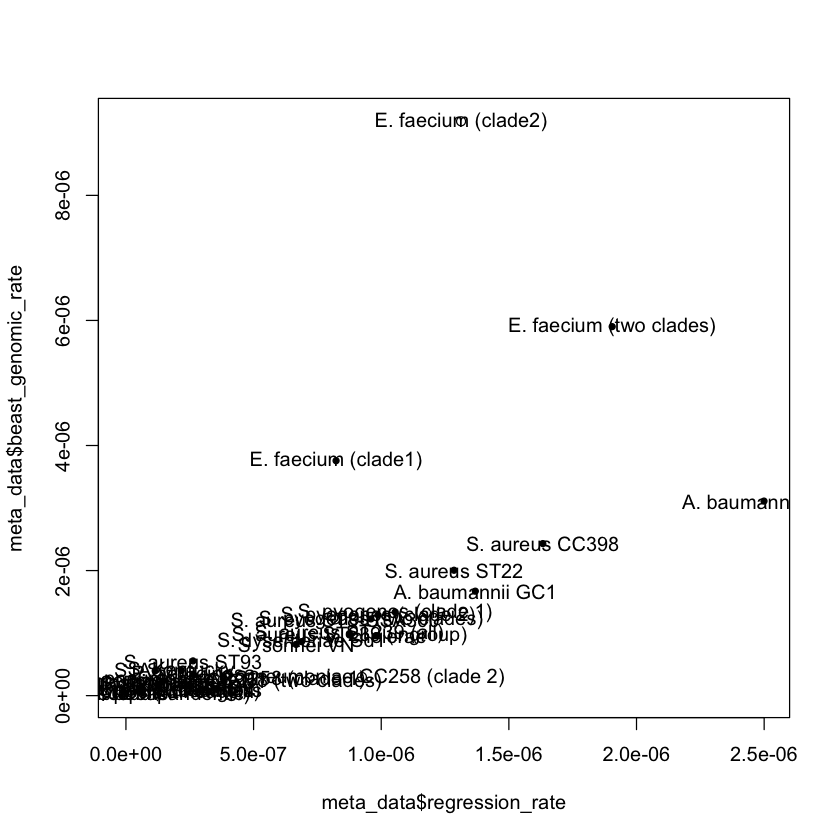

In [46]:
plot(meta_data$regression_rate, meta_data$beast_genomic_rate, pch = drt)
text(meta_data$regression_rate, meta_data$beast_genomic_rate, label = meta_data$Name)

**Fig 1.** Genome-wide rate as a function of genome size **(A)** and sampling time **(B)** in log$_{10}$ scale.

**(A)** The *P* value for the regression (in log$_{10}$ and excluding those that failed the date-randomisation test) is significant and the standard error includes -1. Drake (1993) predicted that there should be an inverse linear relationship between genome size and the rate. He also concludes that the number of substitution per genome replication is approximately constant for microbes because genome size is inversely correlated with the number of replications per unit time.

**(B)** The *P* value for the regression is 0, with a slope of -0.6. This indicates a strong time dependent patter. Importantly, there is no association between sampling time and genome size, such that time-dependency does not explain the trend in **(A)**.


Call:
lm(formula = log10(meta_data$beast_genomic_rate) ~ factor(meta_data$lifestile_coded))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.30452 -0.48881  0.09867  0.58934  1.09200 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -6.1290     0.2253 -27.208   <2e-16 ***
factor(meta_data$lifestile_coded)2  -0.3728     0.2674  -1.394    0.174    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6758 on 29 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.06281,	Adjusted R-squared:  0.03049 
F-statistic: 1.943 on 1 and 29 DF,  p-value: 0.1739


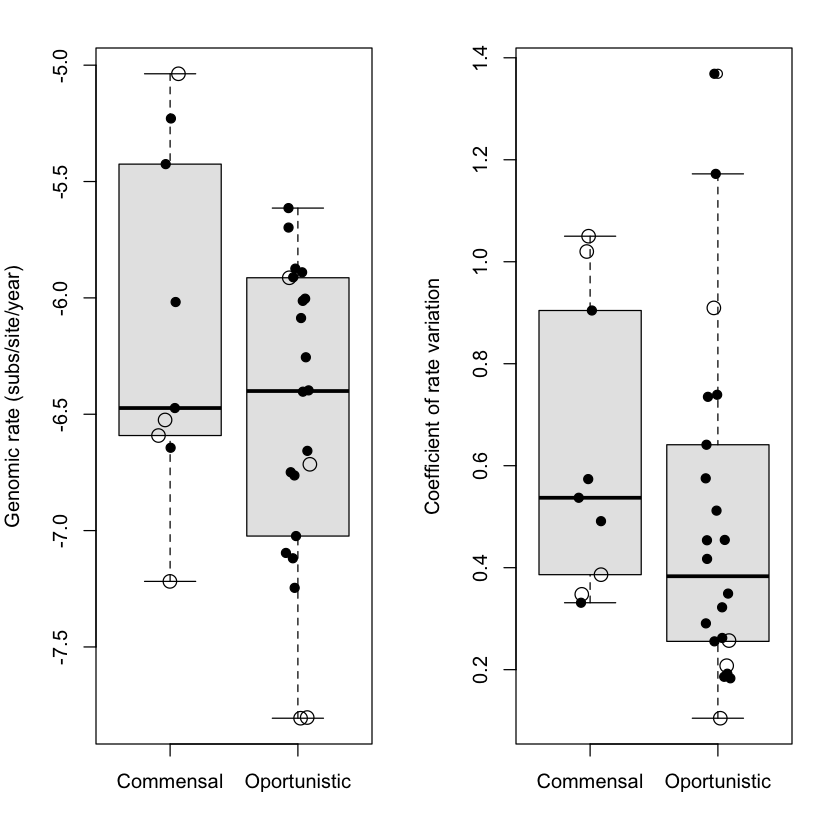

In [47]:
#pdf('fig2.pdf', useDingbats = F, width = 11, height = 5)
par(mfrow = c(2, 1))
par(mar = c(4, 4, 2, 2))
par(mfrow = c(1, 2))
boxplot(log10(meta_data$beast_genomic_rate) ~ meta_data$lifestile_coded-1, names = c('Commensal', 'Oportunistic'),
       ylab = 'Genomic rate (subs/site/year)', col = 'grey90')
points(jitter(meta_data$lifestile_coded, 0.5), log10(meta_data$beast_genomic_rate), 
       pch = drt, cex = 1.5) #, col = gram_code)

boxplot(meta_data$CoefVar ~ meta_data$lifestile_coded-1, names = c('Commensal', 'Oportunistic'),
    ylab = 'Coefficient of rate variation', xlab = '', col = 'grey90')
points(jitter(meta_data$lifestile_coded, 0.5), meta_data$CoefVar, 
       pch = drt, cex = 1.5) #, col = gram_code)
#coefvar_reg <- lm(log10(meta_data$beast_genomic_rate)[pass_cr1] ~ meta_data$CoefVar[pass_cr1]) 
#random_cv_reg <- lm_randomisation(meta_data$beast_genomic_rate[pass_cr1], meta_data$CoefVar[pass_cr1], log_log = F)
#abline(coefvar_reg)
#print(random_cv_reg[[1]])
#print(random_cv_reg[[3]])
#dev.off()
summary(lm(log10(meta_data$beast_genomic_rate) ~ factor(meta_data$lifestile_coded)))

**Fig 2.** Differences in genomic rates and clock-like behaviour between commensal and opportunistic species. 

## plot regressions

In [48]:
# CONVERSION FACTOR FOR SD1 PENDING
addalpha <- function(colors, alpha=1.0) {
  r <- col2rgb(colors, alpha=T)
  # Apply alpha
  r[4,] <- alpha*255
  r <- r/255.0
  return(rgb(r[1,], r[2,], r[3,], r[4,]))
}


pdf('Fig5.pdf', useDingbats = F, width = 15, height = 20)
par(mfrow = c(9, 4))
par(mar = c(3, 3, 3, 3))
cols <- addalpha(colorRampPalette(c('red', 'yellow', 'green'), 
                                  space = 'rgb')(10)[as.numeric(cut(meta_data$temp_stucture_degree, 10))], 0.3)

for(i in 1:nrow(meta_data)){
    print(meta_data[i, 'reg_name'])
    f <- read.table(paste0('all_regressions/', meta_data[i, 'reg_name']), head = T, stringsAsFactors = F)
    f$distance <- f$distance * meta_data$conversion_factor[i]
    f$date <- f$date
    f_reg <- lm(f$distance ~ f$date)
    plot(f$date, f$distance, ylab = '', xlab = '', pch = 20, col = rgb(0, 0, 0, 0.5) , 
         main = meta_data[i, 'Name'],
    ylim = c(min(f$distance)*0.95, max(f$distance) *1.1), xlim = c(min(f$date)-5, max(f$date)), cex = 2)
    abline(f_reg, lwd = 3, col = rgb(1, 0, 0, 0.7), lty = 2)
    rect(par("usr")[1],par("usr")[3],par("usr")[2],par("usr")[4],col = cols[i])
    text(x = (max(f$date) - min(f$date)) / 4 + min(f$date), 
         y = (max(f$distance) - min(f$distance)) / 1.5 + min(f$distance), labels  = format(f_reg$coefficients[2], T))
    text(x = (max(f$date) - min(f$date)) / 4 + min(f$date), 
         y = (max(f$distance) - min(f$distance)) / 1.1  + min(f$distance), labels  = round(summary(f_reg)$r.squared, 2))
}
#
dev.off()

[1] "m_leprae_reg.txt"
[1] "y_pestis_pruned_reg.txt"
[1] "y_pestis_second_pandemic_reg.txt"
[1] "m_tub_argentina_reg.txt"
[1] "neisseria_gubbins_dates_reg.txt"
[1] "paratyphi_a_clades12_reg.txt"
[1] "paratyphi_a_clade1_reg.txt"
[1] "paratyphi_a_clade2_reg.txt"
[1] "b_pertussis_reg.txt"
[1] "typhi_no_outliers_reg.txt"
[1] "TB_beijing_reg.txt"
[1] "s_pneumon_concat_dates_pruned_reg.txt"
[1] "p_aeruginosa_no_outliers_reg.txt"
[1] "agona_pruned_reg.txt"
[1] "s_kentucky_reg.txt"
[1] "st93_reg.txt"
[1] "klebsiella_snps_no_outliers_reg.txt"
[1] "klebsiella_clade1_reg.txt"
[1] "Sd1_reg.txt"
[1] "shigella_sonnei_reg.txt"
[1] "klebsiella_clade2_reg.txt"
[1] "v_cholerae_reg.txt"
[1] "st239_ingroup_reg.txt"
[1] "st239_complete_reg.txt"
[1] "st_usa300_reg.txt"
[1] "strep_pyogenes_clades12_reg.txt"
[1] "strep_pyogenes_clade2_reg.txt"
[1] "strep_pyogenes_clade1_reg.txt"
[1] "A_baumanii_2_reg.txt"
[1] "st22_pruned_reg.txt"
[1] "e_faecium_clade1_reg.txt"
[1] "A_baumanii_1_reg.txt"
[1] "staph_CC398_reg.

pdf 
  2

## Plot heatmap. (potentially figure 4) 

In [11]:
ml_matrix <- read.table('models_chosen.csv', sep= ',', head = T )
ml_matrix <- ml_matrix[-which(ml_matrix$data_set == 'e_faecium_no_outgroups'), ]

ml_matrix <- ml_matrix[, -1]
ml_matrix


,data_set,sc,ss,rc,rs
1,p_aeruginosa_no_outliers,0,1,3,2
2,m_tub_argentina_snps_pruned,0,1,3,2
4,s_pneumon_concat_dates_pruned,0,1,2,3
5,neisseria_gubbins_dates,1,0,3,2
6,klebsiella_snps_no_outliers,2,0,3,1
7,s_kentucky,1,3,0,2
8,m_leprae,3,1,2,0
9,st93_dated,2,0,3,1
10,st239_complete,1,0,3,2
11,klebsiella_clade1,0,2,3,1


In [12]:
ml_matrix$data_set[which(!ml_matrix$data_set %in% meta_data$short_name)]

factor(0)
36 Levels: A_baumanii_1 A_baumanii_2 agona_pruned ... y_pestis_second_pandemic

In [13]:
ml_matrix

,data_set,sc,ss,rc,rs
1,p_aeruginosa_no_outliers,0,1,3,2
2,m_tub_argentina_snps_pruned,0,1,3,2
4,s_pneumon_concat_dates_pruned,0,1,2,3
5,neisseria_gubbins_dates,1,0,3,2
6,klebsiella_snps_no_outliers,2,0,3,1
7,s_kentucky,1,3,0,2
8,m_leprae,3,1,2,0
9,st93_dated,2,0,3,1
10,st239_complete,1,0,3,2
11,klebsiella_clade1,0,2,3,1


In [14]:
pdf('Fig3_and_fig4.pdf', useDingbats = F, height = 7, width = 7)
par(mfrow = c(2, 1))
cols <- colorRampPalette(c('lightyellow', 'orange', 'red'), space = 'rgb')(100)
merged_data <- merge(meta_data[, c('code', 'beast_genomic_rate', 'short_name')], ml_matrix, by.x = 3, by.y = 1)
merged_data <- merged_data[order(merged_data$beast_genomic_rate), -1]

plot_mat <- as.matrix(merged_data[, 3:ncol(merged_data)])
rownames(plot_mat) <- merged_data[, 1]
head(merged_data)
heatmap(plot_mat, Rowv = NA, Colv=NA, col = cols, cexRow  = 0.5)

cols_mut <- colorRampPalette(c('lightyellow',  'blue'), space = 'rgb')(100)

mut_prof_mat <- as.matrix(meta_data[order(meta_data$beast_genomic_rate), c('ac', 'ag', 'at', 'cg', 'gt', 'ct')])
rownames(mut_prof_mat) <- rownames(plot_mat)
heatmap(mut_prof_mat, Rowv = NA, Colv = NA, col = cols, cexRow = 0.5)

dev.off()

,code,beast_genomic_rate,sc,ss,rc,rs
11,M. lep.,1.562162e-08,3,1,2,0
34,Y. pestis,1.572643e-08,0,1,3,2
35,Y. pestis,2.260972e-08,1,0,3,2
12,M. tub.,5.675213e-08,0,1,3,2
13,N. mening.,6.049665e-08,1,0,3,2
17,S. ParaA,7.604037e-08,1,0,2,3


ERROR: Error in `rownames<-`(`*tmp*`, value = c("M. lep.", "Y. pestis", "Y. pestis", : length of 'dimnames' [1] not equal to array extent


pdf 
  2

In [ ]:
mut_prof <- read.csv('mutation_profs.csv', header = T, row.names = 1)
#mut_prof


,code,beast_genomic_rate,sc,ss,rc,rs,strict,relaxed,skyline,constant
11,M. lep.,1.562162e-08,3,1,2,0,2,1,1,2
34,Y. pestis,1.572643e-08,0,1,3,2,1,2,1,2
35,Y. pestis,2.260972e-08,1,0,3,2,1,2,1,2
12,M. tub.,5.675213e-08,0,1,3,2,1,2,1,2
13,N. mening.,6.049665e-08,1,0,3,2,1,2,1,2
17,S. ParaA,7.604037e-08,1,0,2,3,1,2,2,1


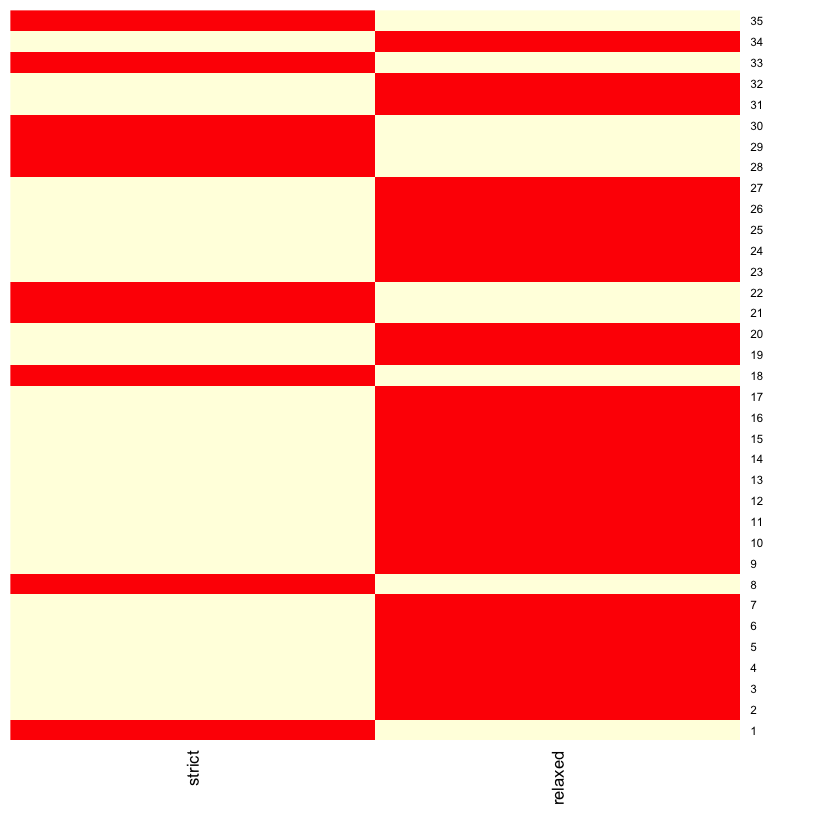

In [15]:
merged_data_clocks <- merged_data
merged_data_clocks$strict <- (merged_data_clocks$ss == 3 | merged_data_clocks$sc == 3) + 1
merged_data_clocks$relaxed <- (merged_data_clocks$rc == 3 |  merged_data_clocks$rs == 3) + 1
merged_data_clocks$skyline <- (merged_data_clocks$ss == 3 |  merged_data_clocks$rs == 3) + 1
merged_data_clocks$constant <- (merged_data_clocks$sc == 3 |  merged_data_clocks$rc == 3) + 1

plot_mat <- as.matrix(merged_data_clocks[, c('strict', 'relaxed')])
rownames(plot_mat) <- merged_data_clocks$short_name
head(merged_data_clocks)
heatmap(plot_mat, Rowv = NA, Colv=NA, col = cols, cexRow  = 0.7, cexCol = 1)

In [16]:
clock_models <- c('s', 's', 'r', 'r')
demo_models <- c('c', 's', 'c', 's')
model_split_matrix <- matrix(NA, nrow(ml_matrix), 2)

for(r in 1:nrow(ml_matrix)){
    model_split_matrix[r, 1] <- clock_models[which.max(ml_matrix[r, 2:5])]
    model_split_matrix[r, 2] <- demo_models[which.max(ml_matrix[r, 2:5])]
}

chisq.test(table(model_split_matrix[, 1], model_split_matrix[, 2]))
fisher.test(table(model_split_matrix[, 1], model_split_matrix[, 2]))

Warning message:
In chisq.test(table(model_split_matrix[, 1], model_split_matrix[, : Chi-squared approximation may be incorrect


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(model_split_matrix[, 1], model_split_matrix[, 2])
X-squared = 7.1458, df = 1, p-value = 0.007514



	Fisher's Exact Test for Count Data

data:  table(model_split_matrix[, 1], model_split_matrix[, 2])
p-value = 0.005591
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
   1.70107 141.35767
sample estimates:
odds ratio 
  11.57632 


In [ ]:
#Think supp info. Table with all the rates, other parameters, and references. Alignments.